In [1]:
x = [0.35, 2.51, 3.21, 4.39, 5.76, 5.82, 15.13, 17.31, 19.63, 22.49, 26.78, 27.5, 33.37, 39.73, 39.99, 45.21, 46.25, 46.4, 46.84, 47.42, 49.47, 49.49, 52.02, 52.72, 55.47, 55.89, 56.53, 60.33, 62.52, 63.4, 63.63, 65.9, 66.3, 70.51, 74.87, 81.58, 82.43, 83.28, 83.62, 88.47, 93.17, 94.85, 98.96, 99.2, 99.3]
y = [3.91, 0.79, -3.33, 10.23, 15.49, 1.56, 26.18, 30.29, 35.24, 27.19, 48.06, 37.83, 55.06, 60.42, 60.95, 88.54, 85.96, 82.63, 82.58, 93.85, 86.51, 102.68, 95.89, 100.32, 113.04, 116.39, 115.91, 128.15, 148.76, 145.49, 133.96, 150.47, 160.86, 165.61, 179.1, 221.17, 221.91, 225.03, 216.23, 240.49, 272.96, 273.06, 300.07, 302.14, 297.44]
     

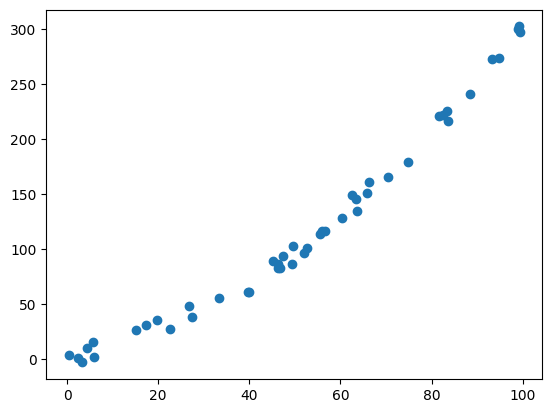

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.scatter(x, y)

Minimize the loss using gradient descent on the weights. Gradient descent happens by updating the weight using: w = w - alpha\*d(J)/dw. y_i = X_ij\*wj, X = [x^2, x, 1], shape(X) = (len(x), 3). dJ/dw_k = (1/m)(X_ij\*w_j - y_i)X_ik

In [3]:
class LinReg():
    def __init__(self, x, y, alpha, cutoff):
        self.x = np.array(x).reshape(1, len(x))
        self.y = np.array(y)
        self.alpha = alpha
        self.cutoff = cutoff
        
        self.X = np.concatenate([self.x**2, self.x, np.ones_like(self.x)]).T
        self.w = np.random.uniform(size=3)
    
    def _calc_loss(self):
        return (1/(2*len(self.X)))*sum((self.X.dot(self.w) - self.y)**2)
    
    def _plot_curve(self):
        N = 100
        x_fit = np.linspace(self.x.min(), self.x.max(), N).reshape(1, N)
        X_fit = np.concatenate([x_fit**2, x_fit, np.ones_like(x_fit)]).T
        y_fit = X_fit.dot(self.w.T)
        
        plt.figure()
        plt.scatter(x, y)
        plt.plot(x_fit.reshape(N, 1), y_fit)
    
    def fit(self):
        loss = float('inf')
        ii = 0
        print(self.w)
        self._plot_curve()
        while (loss > self.cutoff) and (ii < 1000):  # HERE: change this self.cutoff
            self.grad = (1/len(self.X))*(self.X.dot(self.w) - self.y)@self.X
            self.w -= self.alpha*self.grad
            loss = self._calc_loss()
            self._plot_curve()
            ii += 1

[0.93769569 0.11624293 0.73805893]
[0.03085593 0.10499843 0.73790988]


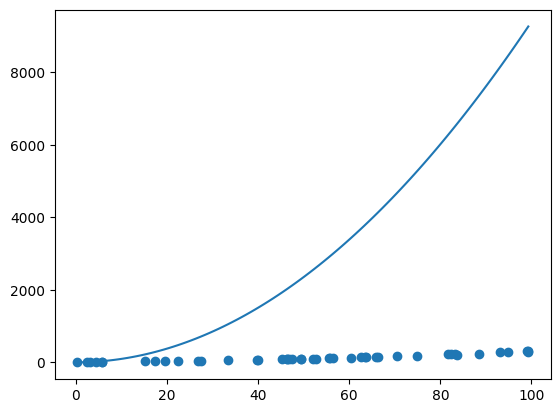

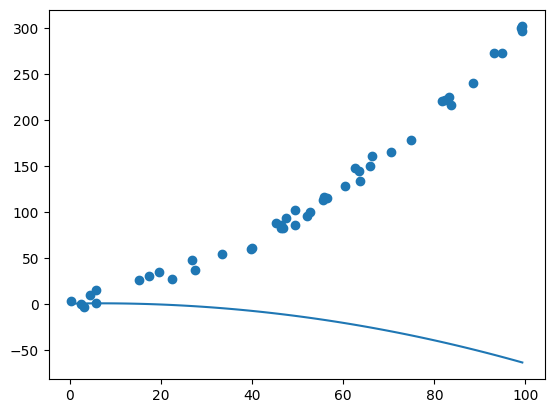

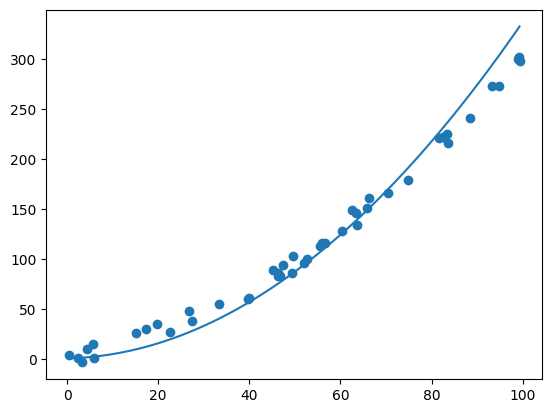

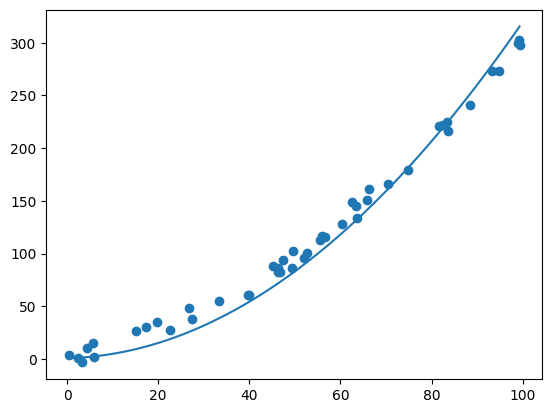

In [6]:
lr = LinReg(x, y, 5e-8, 100)  # this was very sensitive to the alpha
lr.fit()
print(lr.w)

In [ ]:
# F- I-- N---